In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from matplotlib.animation import PillowWriter
import matplotlib
sp.init_printing()

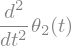

In [14]:
t, g, l1, l2, m1, m2, m3, L0, k = sp.symbols("t g l_0 l_2 m_1 m_2 m_3 L_0 k", positive=True, real=True)
theta1, theta2 = sp.symbols(r"\theta_1 \theta_2", cls=sp.Function)
theta1 = theta1(t)
theta2 = theta2(t)
theta1_d = sp.diff(theta1, t)
theta2_d = sp.diff(theta2, t)
theta1_dd = sp.diff(theta1_d, t)
theta2_dd = sp.diff(theta2_d, t)
theta2_dd


In [15]:
x1 = l1 * sp.cos(theta1)
y1 = l1 * -sp.sin(theta1)
x2 = 2*x1
y2 = 0
x3 = 2*x1 + l2 * sp.sin(theta2)
y3 = l2 * -sp.cos(theta2)


In [16]:
T = sp.Rational(1, 2) * m1 * (sp.diff(x1, t)**2 + sp.diff(y1, t)**2) \
    + sp.Rational(1, 2) * m2 * (sp.diff(x2, t)**2 + sp.diff(y2, t)**2) \
    + sp.Rational(1, 2) * m3 * (sp.diff(x3, t)**2 + sp.diff(y3, t)**2)

V = m1 * g * y1 + m2 * g * y2 + m3 * g * y3 + sp.Rational(1, 2) * k * (x2 - L0)**2
L = T - V

In [17]:
LE1 = (sp.diff(sp.diff(L, theta1_d), t) - sp.diff(L, theta1)).simplify()
LE2 = (sp.diff(sp.diff(L, theta2_d), t) - sp.diff(L, theta2)).simplify()

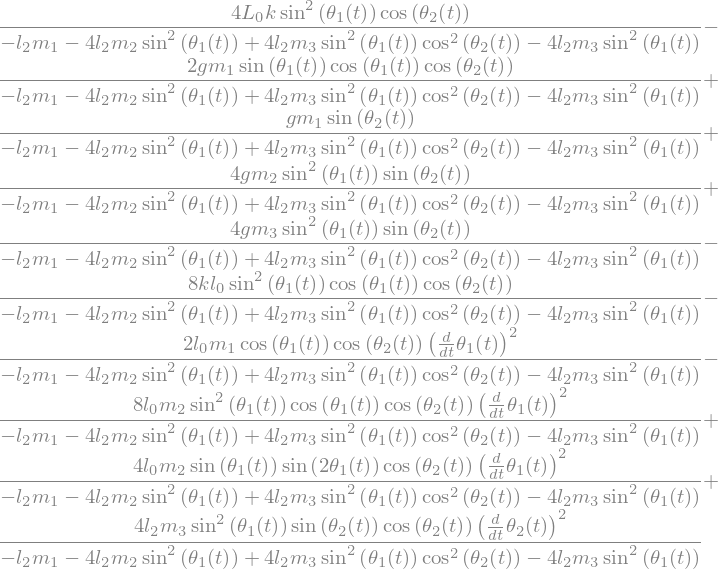

In [18]:
sols = sp.solve([LE1, LE2], (theta1_dd, theta2_dd), simplify = False, rational=False)
sols[theta2_dd]

In [19]:
dz1dt_f = sp.lambdify((t, g, m1, m2, m3, l1, l2, L0, k, theta1, theta2, theta1_d, theta2_d), sols[theta1_dd])
dz2dt_f = sp.lambdify((t, g, m1, m2, m3, l1, l2, L0, k, theta1, theta2, theta1_d, theta2_d), sols[theta2_dd])
dthe1dt_f = sp.lambdify(theta1_d, theta1_d)
dthe2dt_f = sp.lambdify(theta2_d, theta2_d)

In [20]:
def dSdt(S, t, g, m1, m2, m3, l1, l2, L0, k):
    theta1, z1, theta2, z2 = S
    return [dthe1dt_f(z1),
            dz1dt_f(t, g, m1, m2, m3, l1, l2, L0, k, theta1, theta2, z1, z2),
            dthe2dt_f(z2),
            dz2dt_f(t, g, m1, m2, m3, l1, l2, L0, k, theta1, theta2, z1, z2)]

In [21]:
t = np.linspace(0, 10, 251)
g = 1.6
m1 = 12
m2 = 3
m3 = 6
l1 = 1
l2 = 1
L0 = 1
k = 150
ans = odeint(dSdt, y0=[np.pi/4, 2, np.pi/4, 2], t=t, args=(g,m1,m2,m3,l1,l2,L0,k))

In [22]:
theta1 = ans.T[0]
theta2 = ans.T[2]
plt.plot(t, theta1)
plt.plot(t, theta2)
plt.show()

C:\Users\noahh_5okoea\AppData\Local\Temp\ipykernel_12924\1186105484.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [23]:
def get_x1y1x2y2x3y3(t, theta1, theta2, l1, l2):
    return (l1*np.cos(theta1),
            -l1*np.sin(theta1), 
            2*l1*np.cos(theta1), 
            np.zeros(len(theta1)), 
            2*l1*np.cos(theta1)+l2*np.sin(theta2), 
            -l2*np.cos(theta2))

x1, y1, x2, y2, x3, y3 = get_x1y1x2y2x3y3(t, theta1, theta2, l1, l2)

In [35]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i], x3[i]], [0, y1[i], y2[i], y3[i]])
    ln2.set_data([0, x2[i]],[0, y2[i]])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor("k")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ln2, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-2.4, 1.6)
ax.set_xlim(-0.8, 3.2)
ani = animation.FuncAnimation(fig, animate, frames = 250, interval=50)
ani.save("lagrangian.mp4", writer='pillow', fps=25)


ValueError: unknown file extension: .mp4